# Matrices de adyacencia para tiempo y distancia

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Obtención del diccionario de información.

In [2]:
with open('Consultas_googleApi.pickle', 'rb') as handle:
    recuperacion = pickle.load(handle)

In [4]:
recuperacion.keys()

dict_keys([(-0.20248826666666667, -78.50040125), (-0.21495733333333333, -78.49079993333334), (-0.20644891999999998, -78.49941296), (-0.21103442500000003, -78.4981667125), (-0.20301313333333335, -78.50411983333333), (-0.2126993, -78.491860325), (-0.21029951428571433, -78.49388817142858), (-0.20728062500000002, -78.498081775), (-0.19816061999999998, -78.49596283), (-0.2083583, -78.49622876666668), (-0.20041799999999999, -78.50095725), (-0.211726575, -78.5013562), (-0.2042497, -78.5021648), (-0.21373910000000002, -78.4978411), (-0.20246205, -78.5013519), (-0.197645025, -78.50026352500001), (-0.20381238333333332, -78.5007766), (-0.20952433333333334, -78.49254119999999), (-0.20430165, -78.50571395), (-0.20557, -78.4919239), (-0.21137536666666668, -78.49542793333333), (-0.20020670000000002, -78.49098605), (-0.20768993333333333, -78.49984930000001), (-0.21096573333333335, -78.49978503333334), (-0.20872455454545458, -78.49558266363637), (-0.214803425, -78.500259975), (-0.21235037499999998, -78

In [6]:
recuperacion[(-0.20248826666666667,
  -78.50040125)]

[{'destination_addresses': ['Perez Guerrero Y Versalles, Quito, Ecuador'],
  'origin_addresses': ['San Gregorio &, Quito 170129, Ecuador'],
  'rows': [{'elements': [{'distance': {'text': '0.2 km', 'value': 209},
      'duration': {'text': '1 min', 'value': 62},
      'status': 'OK'}]}],
  'status': 'OK'},
 {'destination_addresses': ['Av. 10 de Agosto 170526, Quito 170129, Ecuador'],
  'origin_addresses': ['San Gregorio &, Quito 170129, Ecuador'],
  'rows': [{'elements': [{'distance': {'text': '0.3 km', 'value': 257},
      'duration': {'text': '1 min', 'value': 64},
      'status': 'OK'}]}],
  'status': 'OK'}]

In [8]:
data_point = pd.read_csv('centros_googleApi')

In [9]:
data_point.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,cluster_point
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"(-78.50040125, -0.20248826666666667)"
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(-78.49079993333334, -0.21495733333333333)"
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"(-78.49941296, -0.20644891999999998)"
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(-78.4981667125, -0.21103442500000003)"
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(-78.50411983333333, -0.20301313333333335)"


In [35]:
adj_matrix = data_point.iloc[:,1:-1].values

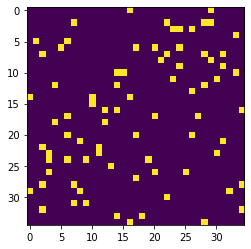

In [147]:
plt.imshow(adj_matrix)

In [47]:
for point in recuperacion[(-0.20248826666666667, -78.50040125)]:
    print(point['rows'])

[{'elements': [{'distance': {'text': '0.2 km', 'value': 209}, 'duration': {'text': '1 min', 'value': 62}, 'status': 'OK'}]}]
[{'elements': [{'distance': {'text': '0.3 km', 'value': 257}, 'duration': {'text': '1 min', 'value': 64}, 'status': 'OK'}]}]


In [60]:
point['rows'][0]['elements'][0]['distance']['text']

'0.3 km'

In [139]:
point['rows'][0]['elements'][0]['duration']['text']

'1 min'

In [141]:
numero,unidad = point['rows'][0]['elements'][0]['duration']['text'].split()

In [142]:
int(numero)

1

Matrices distintas

In [164]:
time_matrix = np.zeros((35,35))
distance_matrix = np.zeros((35,35))

#verificar que siempre se use la misma unidad de tiempo
unidades_tiempo = []
#verificar que siempre se use la misma medida de distancia
unidades_distancia = []

In [165]:
idx_vecinos = np.where(adj_matrix[0]==1)[0]
idx_vecinos

array([16, 29], dtype=int64)

In [166]:
#recorro cada nodo
for i,key in enumerate(recuperacion):
    #posicion en la adj_matrix
    idx_vecinos = np.where(adj_matrix[i]==1)[0]
    #recorro los vecinos
    for j,point in enumerate(recuperacion[key]):
        idx_vecino = idx_vecinos[j]
       
        #almaceno el tiempo
        numero,unidad = point['rows'][0]['elements'][0]['duration']['text'].split()        
        time_matrix[i][idx_vecino] = float(numero)
        
        #almaceno la unidad
        if(unidad not in unidades_tiempo):
            unidades_tiempo.append(unidad)
            print(point['rows'][0]['elements'][0]['duration']['text'])
        
        #almaceno la distancia
        numero,unidad = point['rows'][0]['elements'][0]['distance']['text'].split()
        distance_matrix[i][idx_vecino] = float(numero)
        
        #almaceno la unidad
        if(unidad not in unidades_distancia):
            unidades_distancia.append(unidad)
            print(point['rows'][0]['elements'][0]['distance']['text'])

1 min
0.2 km
2 mins
81 m


In [182]:
time_matrix[2]


array([0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 4., 5., 0., 0., 0., 0.,
       0.])

In [183]:
adj_matrix[2]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0.])

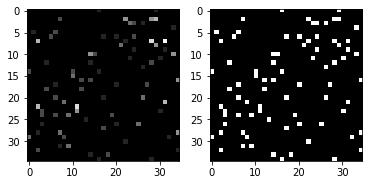

In [178]:
plt.subplot(1,2,1)
plt.imshow(time_matrix,'gray')
plt.subplot(1,2,2)
plt.imshow(adj_matrix,'gray')

In [160]:
distance_matrix

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0.4, ..., 0. , 0. , 0.2],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

Hay distancias medidas en metros, hay que estandarizar.

In [161]:
unidades_distancia

['km', 'm']

Las unidades de tiempo no tienen problema

In [162]:
unidades_tiempo

['min', 'mins']

In [168]:
def km2m(kms):
    return kms * 1000

In [170]:
km2m(3)

3000

In [190]:
distance_matrix = np.zeros((35,35))

#recorro cada nodo
for i,key in enumerate(recuperacion):
    #posicion en la adj_matrix
    idx_vecinos = np.where(adj_matrix[i]==1)[0]
    #recorro los vecinos
    for j,point in enumerate(recuperacion[key]):
        idx_vecino = idx_vecinos[j]
       
        #almaceno la distancia
        numero,unidad = point['rows'][0]['elements'][0]['distance']['text'].split()
        
        numero = float(numero)
        if(unidad=='km'):
            numero = km2m(numero)        
        distance_matrix[i][idx_vecino] = numero
        

In [205]:
distance_matrix[2]

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,  600.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0., 1400.,    0.,    0.,    0.,    0.,
          0., 1200., 2000.,    0.,    0.,    0.,    0.,    0.])

In [206]:
adj_matrix[2]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0.])

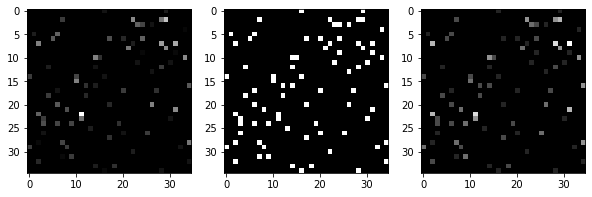

In [202]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(distance_matrix,'gray')
plt.subplot(1,3,2)
plt.imshow(adj_matrix,'gray')
plt.subplot(1,3,3)
plt.imshow(time_matrix,'gray')


In [130]:
clusters_pos = np.array(list(recuperacion.keys()))

In [131]:
clusters_pos_x = list(clusters_pos[:,1]).copy()
clusters_pos_x

[-78.50040125,
 -78.49079993333334,
 -78.49941296,
 -78.4981667125,
 -78.50411983333333,
 -78.491860325,
 -78.49388817142858,
 -78.498081775,
 -78.49596283,
 -78.49622876666668,
 -78.50095725,
 -78.5013562,
 -78.5021648,
 -78.4978411,
 -78.5013519,
 -78.50026352500001,
 -78.5007766,
 -78.49254119999999,
 -78.50571395,
 -78.4919239,
 -78.49542793333333,
 -78.49098605,
 -78.49984930000001,
 -78.49978503333334,
 -78.49558266363637,
 -78.500259975,
 -78.49691080000001,
 -78.4912293,
 -78.499905125,
 -78.49823549999999,
 -78.5007215,
 -78.49702765,
 -78.4990074,
 -78.50347635,
 -78.5003718]

In [132]:
clusters_pos[:,1] = clusters_pos[:,0]
clusters_pos

array([[-0.20248827, -0.20248827],
       [-0.21495733, -0.21495733],
       [-0.20644892, -0.20644892],
       [-0.21103443, -0.21103443],
       [-0.20301313, -0.20301313],
       [-0.2126993 , -0.2126993 ],
       [-0.21029951, -0.21029951],
       [-0.20728063, -0.20728063],
       [-0.19816062, -0.19816062],
       [-0.2083583 , -0.2083583 ],
       [-0.200418  , -0.200418  ],
       [-0.21172658, -0.21172658],
       [-0.2042497 , -0.2042497 ],
       [-0.2137391 , -0.2137391 ],
       [-0.20246205, -0.20246205],
       [-0.19764503, -0.19764503],
       [-0.20381238, -0.20381238],
       [-0.20952433, -0.20952433],
       [-0.20430165, -0.20430165],
       [-0.20557   , -0.20557   ],
       [-0.21137537, -0.21137537],
       [-0.2002067 , -0.2002067 ],
       [-0.20768993, -0.20768993],
       [-0.21096573, -0.21096573],
       [-0.20872455, -0.20872455],
       [-0.21480342, -0.21480342],
       [-0.21235037, -0.21235037],
       [-0.208703  , -0.208703  ],
       [-0.20550498,

In [133]:
clusters_pos[:,0] = clusters_pos_x
clusters_pos

array([[-78.50040125,  -0.20248827],
       [-78.49079993,  -0.21495733],
       [-78.49941296,  -0.20644892],
       [-78.49816671,  -0.21103443],
       [-78.50411983,  -0.20301313],
       [-78.49186033,  -0.2126993 ],
       [-78.49388817,  -0.21029951],
       [-78.49808178,  -0.20728063],
       [-78.49596283,  -0.19816062],
       [-78.49622877,  -0.2083583 ],
       [-78.50095725,  -0.200418  ],
       [-78.5013562 ,  -0.21172658],
       [-78.5021648 ,  -0.2042497 ],
       [-78.4978411 ,  -0.2137391 ],
       [-78.5013519 ,  -0.20246205],
       [-78.50026353,  -0.19764503],
       [-78.5007766 ,  -0.20381238],
       [-78.4925412 ,  -0.20952433],
       [-78.50571395,  -0.20430165],
       [-78.4919239 ,  -0.20557   ],
       [-78.49542793,  -0.21137537],
       [-78.49098605,  -0.2002067 ],
       [-78.4998493 ,  -0.20768993],
       [-78.49978503,  -0.21096573],
       [-78.49558266,  -0.20872455],
       [-78.50025998,  -0.21480342],
       [-78.4969108 ,  -0.21235037],
 

In [65]:
graph = nx.Graph()

In [69]:
clusters = np.arange(35)
graph.add_nodes_from(clusters)

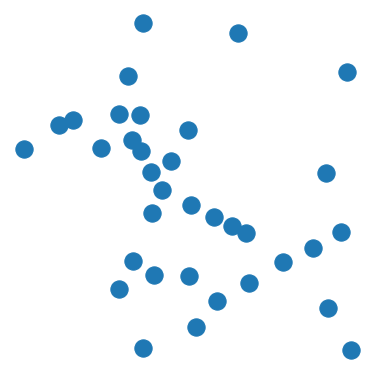

In [137]:
plt.figure(figsize=(5,5))

nx.draw(graph,pos=clusters_pos)

In [207]:
data_distance = pd.DataFrame(distance_matrix)

In [208]:
data_distance

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,300.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,0.0,...,0.0,0.0,0.0,1200.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,0.0
5,0.0,300.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,900.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1600.0,0.0,0.0,1700.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1400.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0


In [209]:
data_time = pd.DataFrame(time_matrix)

In [210]:
data_time

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,7.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [211]:
data_time.to_csv(r'time_matrix.csv')

In [212]:
data_distance.to_csv(r'distance_matrix.csv')